Also this lab, we're going to reuse last week's environment: **GridWorld**. The different is our agent. If you don't remember what is GridWorld, please revise your last lab excercise in advance

[[ 0  1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14 15]
 [16 17 18 19 20 21 22 23]
 [24 25 26 27 28 29 30 31]
 [32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47]
 [48 49 50 51 52 53 54 55]
 [56 57 58 59 60 61 62 63]]
i = 0|Start at 17 results at 56 get Reward: -15
i = 1|Start at 18 results at 56 get Reward: -15
i = 2|Start at 19 results at 56 get Reward: -15
i = 3|Start at 21 results at 56 get Reward: -15
i = 4|Start at 25 results at 56 get Reward: -15
i = 5|Start at 33 results at 56 get Reward: -15
i = 6|Start at 41 results at 56 get Reward: -15
i = 7|Start at 42 results at 56 get Reward: -15
i = 8|Start at 43 results at 56 get Reward: -15
i = 9|Start at 46 results at 56 get Reward: -15
i = 10|Start at 47 results at 56 get Reward: -15
i = 11|Start at 47 results at 56 get Reward: -15
i = 12|Start at 15 results at 56 get Reward: 15
i = 13|Start at 1 results at 10 get Reward: 5
i = 14|Start at 26 results at 56 get Reward: 20
iter: 100	 Total reward: -120	 Average: -1.2121212121212122
ite

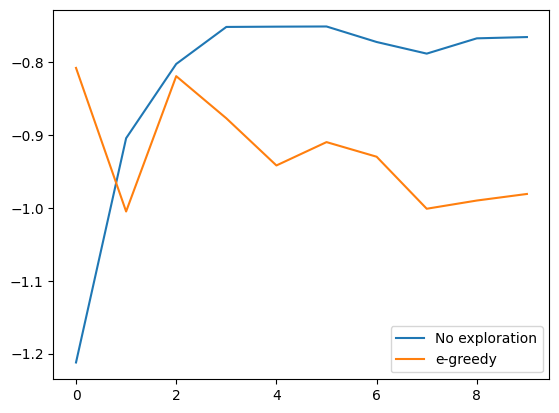

In [2]:
from lab01 import environment, MABe_agent

Estimation updates:
>Q-learning:
$Q(S_t,A_t) = (1-\alpha)Q(S_t,A_t) + \alpha(R + \gamma max_a Q(S_{t+1},a))$

>SARSA:
$Q(S_t, A_t) = (1-\alpha)Q(S_t,A_t) + \alpha(R + \gamma Q(S_{t+1},A_{t+1}))$



---
On-policy and Off-policy 
---
1. On-policy:
  
  **On-policy** is a group of reinforcement learning methods that **use the value resulting from a different policy to update the current policy**

2. Off-policy:

  **Off-policy** is a group of reinforcement learning methods that **use the value resulting directly from the current policy to update itself**

3. On-policy, off-policy, cons & pros:

*   Off-policy methods are usually learning more about the environment they can use multiple policies' experience. Thus, they're more data-sampling efficient. Famous: *Q-learning, DQN and its extensions*

*   On-policy methods are usually more realistic (most of the time, we can only depend on our own policy for the data we can collect, especially in policy-based methods) and fast converging but not as sampling-efficient as off-policy methods




## Q-learning method

In this section, we're going to implement tabular Q-learning agent and see its performance.

Q-agent inherits from MABe-agent we implemented earlier in this course

In [16]:
class Q_agent(MABe_agent):
  def __init__(self,envir, init_location, epsilon):
    super(Q_agent, self).__init__(envir, init_location)
    self.Q_table = None

  def getAction(self, observation):
    location_now, action_space, pre_reward = observation
    if location_now is not None:
        self.location_now = location_now

    if pre_reward is not None:
        self.reward_trace.append(pre_reward)
    
    action = np.random.choice(
        action_space,
        p=[1 / len(action_space) for _ in action_space]
    )

    assert action in action_space, "INVALID action taken"
    return action


In [12]:
Envir = environment(8,8)
Envir.map_Designate(17,56,-15)
Envir.map_Designate(18,56,-15)
Envir.map_Designate(19,56,-15)
Envir.map_Designate(21,56,-15)
Envir.map_Designate(25,56,-15)
Envir.map_Designate(33,56,-15)
Envir.map_Designate(41,56,-15)
Envir.map_Designate(42,56,-15)
Envir.map_Designate(43,56,-15)
Envir.map_Designate(46,56,-15)
Envir.map_Designate(47,56,-15)
Envir.map_Designate(47,56,-15)
Envir.map_Designate(15,56,+15)
Envir.map_Designate(1,10,+5)
Envir.map_Designate(26,56,+20)

In [19]:
import numpy as np
init_location=0
dummy_q_agent = Q_agent(envir=Envir, init_location=init_location,epsilon=0.1)

num_iter = 1000

log_freq = 100
Data_plot1 = []

for i in range(num_iter):
  env_observation = (init_location, Envir.action_space, None)
  if i > 0:
    env_observation = Envir.get_Observation(location=dummy_q_agent.location_now, action=chosen_action)

  chosen_action = dummy_q_agent.getAction(observation=env_observation)
  if (i + 1) % log_freq == 0:
    aver = np.mean(dummy_q_agent.reward_trace)
    Data_plot1.append(aver)
    print('iter: ' + str(i + 1) + '\t Total reward: ' + str(dummy_q_agent.get_TotalReward()) + '\t Average: ' + str(aver))

iter: 100	 Total reward: -85	 Average: -0.8585858585858586
iter: 200	 Total reward: -160	 Average: -0.8040201005025126
iter: 300	 Total reward: -235	 Average: -0.7859531772575251
iter: 400	 Total reward: -310	 Average: -0.7769423558897243
iter: 500	 Total reward: -400	 Average: -0.8016032064128257
iter: 600	 Total reward: -505	 Average: -0.8430717863105175
iter: 700	 Total reward: -595	 Average: -0.8512160228898427
iter: 800	 Total reward: -670	 Average: -0.8385481852315394
iter: 900	 Total reward: -790	 Average: -0.8787541713014461
iter: 1000	 Total reward: -925	 Average: -0.9259259259259259


## SARSA

SARSA is the on-policy version of Q-learning
The different is observable through its updating rule

> $Q(S_t, A_t) = (1-\alpha)Q(S_t,A_t) + \alpha(R + \gamma Q(S_{t+1},A_{t+1}))$

Meaning: the sequence of observation is
> $S_t \to A_t \to R \to S_{t+1} \to A_{t+1}$ 

*HENCE*: **S-A-R-S-A**


In [22]:
class SARSA_agent(MABe_agent):
    def __init__(self, envir, init_location, epsilon):
        super(SARSA_agent, self).__init__(envir, init_location)
        self.epsilon = epsilon
        self.Q_table = None

    def getAction(self, observation):
        location_now, action_space, pre_reward = observation

        if location_now is not None:
            self.location_now = location_now

        if pre_reward is not None:
            self.reward_trace.append(pre_reward)

        # random action
        action = np.random.choice(
            action_space, 
            p=[1 / len(action_space) for _ in action_space]
        )

        assert action in action_space, "INVALID action taken"
        return action


# === Chạy thử ===
init_location = 0
dummy_sarsa_agent = SARSA_agent(envir=Envir, init_location=init_location, epsilon=0.1)

num_iter = 1000
log_freq = 100
Data_plot2 = []

for i in range(num_iter):
    env_observation = (init_location, Envir.action_space, None)
    if i > 0:
        env_observation = Envir.get_Observation(
            location=dummy_sarsa_agent.location_now,
            action=chosen_action
        )

    chosen_action = dummy_sarsa_agent.getAction(observation=env_observation)

    if (i + 1) % log_freq == 0:
        aver = np.mean(dummy_sarsa_agent.reward_trace)
        Data_plot2.append(aver)
        print(
            f"iter: {i + 1}\t Total reward: {dummy_sarsa_agent.get_TotalReward()}\t Average: {aver}"
        )



iter: 100	 Total reward: -90	 Average: -0.9090909090909091
iter: 200	 Total reward: -210	 Average: -1.0552763819095476
iter: 300	 Total reward: -270	 Average: -0.903010033444816
iter: 400	 Total reward: -345	 Average: -0.8646616541353384
iter: 500	 Total reward: -450	 Average: -0.9018036072144289
iter: 600	 Total reward: -570	 Average: -0.9515859766277128
iter: 700	 Total reward: -645	 Average: -0.9227467811158798
iter: 800	 Total reward: -750	 Average: -0.9386733416770964
iter: 900	 Total reward: -840	 Average: -0.9343715239154616
iter: 1000	 Total reward: -900	 Average: -0.9009009009009009
